![data_viz.jpeg](data_viz.jpeg)

**Data Viz Beauty** - someone who is loved not only for their data viz skills, but for their personality. Overall cool person and usually has great stories. Might also have great flow.  

## Cheat Sheets 
- [Matplotlib gallery](https://matplotlib.org/stable/gallery/)
- [Python Visualization Gallery](https://www.python-graph-gallery.com/)

In [74]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [142]:
# load in data 
df = pd.read_csv('nhl.csv')
df.head()

,player,team,gp,g,a,tp,ppg,pim,+/-,link,season,league,playername,position
0,Jaromír Jágr (RW),Pittsburgh Penguins,81,52,69,121,1.49,42,19.0,https://www.eliteprospects.com/player/8627/jar...,2000,nhl,Jaromír Jágr,RW
1,Joe Sakic (C),Colorado Avalanche,82,54,64,118,1.44,30,45.0,https://www.eliteprospects.com/player/8862/joe...,2000,nhl,Joe Sakic,C
2,Patrik Elias (LW),New Jersey Devils,82,40,56,96,1.17,51,45.0,https://www.eliteprospects.com/player/8698/pat...,2000,nhl,Patrik Elias,LW
3,Alexei Kovalev (RW),Pittsburgh Penguins,79,44,51,95,1.20,96,12.0,https://www.eliteprospects.com/player/8670/ale...,2000,nhl,Alexei Kovalev,RW
4,Jason Allison (C),Boston Bruins,82,36,59,95,1.16,85,-8.0,https://www.eliteprospects.com/player/9064/jas...,2000,nhl,Jason Allison,C


In [146]:
# list all available matplotlib styles 
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [147]:
# use fivethirtyeight
plt.style.use('fivethirtyeight')

### Categorical Data - 1 Feature

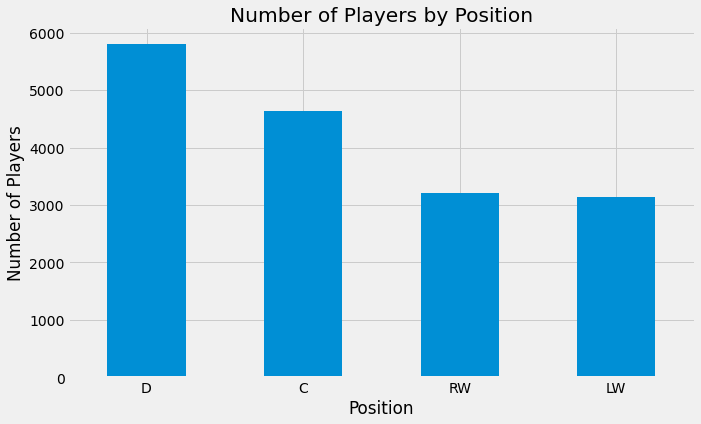

In [148]:
# visualize number of players at each position
# since categorical I will use a count plot 

df['position'].value_counts().plot(kind = 'bar', figsize = (10, 6))
plt.xticks(rotation = 0)
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.title('Number of Players by Position');

**Bonus: Add counts to bar plot**

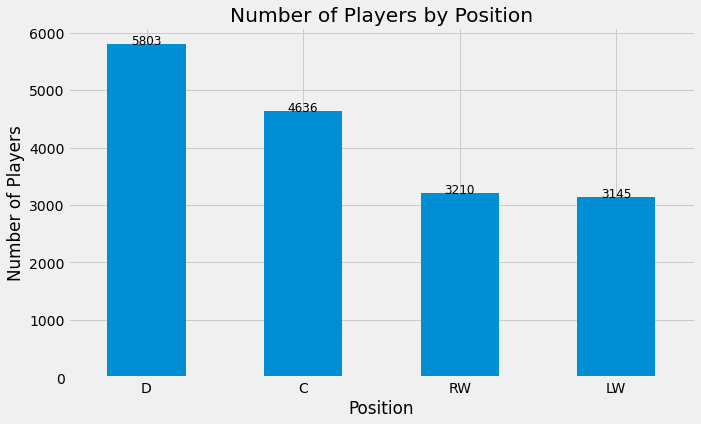

In [149]:
df['position'].value_counts().plot(kind = 'bar', figsize = (10, 6))
plt.xticks(rotation = 0)
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.title('Number of Players by Position');
vals = list(df['position'].value_counts().values)
for i in range(len(vals)):
    plt.text(i, vals[i], vals[i], ha = 'center', fontsize = 12)

/var/folders/fz/lqw0sxh148gfqcgkqm8cqhqr0000gn/T/ipykernel_28094/2089188846.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


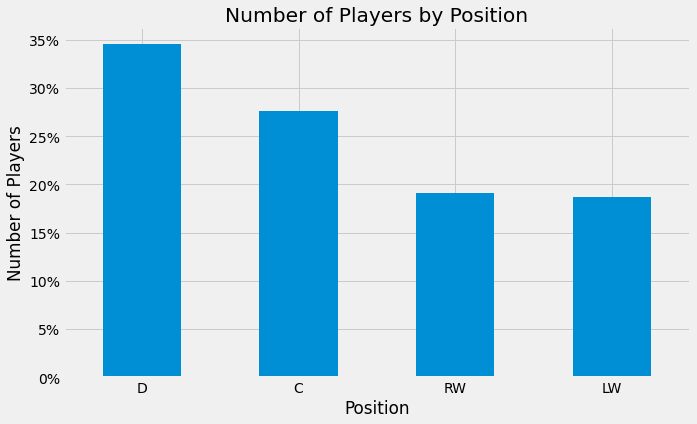

In [150]:
# We can also plot the percentages instead of the raw numbers 
ax = df['position'].value_counts(normalize = True).plot(kind = 'bar', figsize = (10, 6))
# make y axis a percentage 
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.xticks(rotation = 0)
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.title('Number of Players by Position');

> This means that roughly 35% of players in the NHL play Defense 

### Continuous Data - 1 Feature

Lets look at the distribution of PPG 
> Note for Barb: PPG (points per game) is defined as: $$ \frac{total\;points}{games\;played} $$

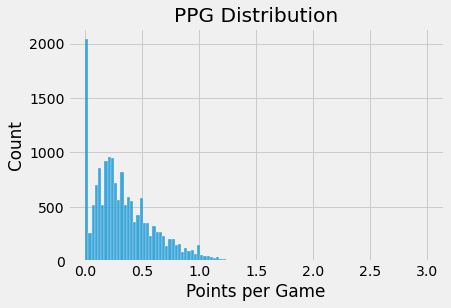

In [151]:
# start with histogram 
sns.histplot(df['ppg'])
plt.xlabel('Points per Game')
plt.title('PPG Distribution');
# most players have a PPG of less than 0.5 and there are some outliers with high PPG

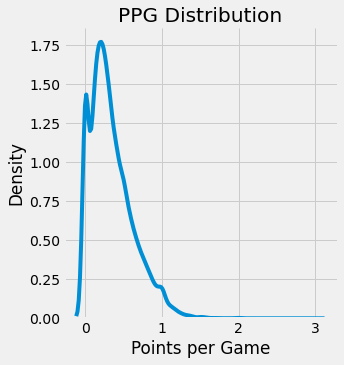

In [152]:
# can also use a density plot 
sns.displot(df['ppg'], kind = 'kde')
plt.xlabel('Points per Game')
plt.title('PPG Distribution');
# this smooths out the distribution 

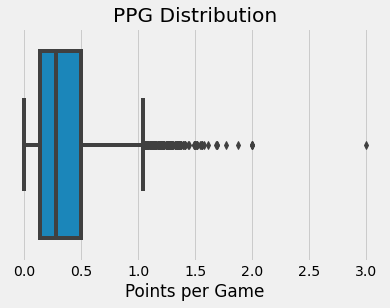

In [153]:
# boxplot 
sns.boxplot(x = df['ppg'])
plt.xlabel('Points per Game')
plt.title('PPG Distribution');

### Categorical and Categorical Data - 2 Features 

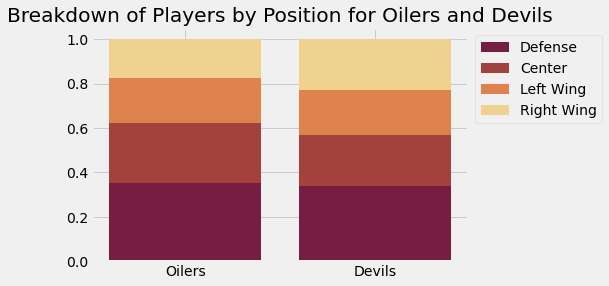

In [154]:
# plot count of player position by team for Edmonton Oilers and New Jersey Devils 
# stacked bar chart 
oilers = df[df['team'] == 'Edmonton Oilers']['position'].value_counts(normalize = True)
devils = df[df['team'] == 'New Jersey Devils']['position'].value_counts(normalize = True)

# make arrays with percentage for each position
defense = np.array([oilers['D'], devils['D']])
center = np.array([oilers['C'], devils['C']])
left_wing = np.array([oilers['LW'], devils['LW']])
right_wing = np.array([oilers['RW'], devils['RW']])

# add defense
plt.bar(range(2), defense, color = '#781D42', label = 'Defense')
# add center
plt.bar(range(2), center, color = '#A3423C', label = 'Center', bottom = defense)
# add left wing
plt.bar(range(2), left_wing, color = '#DE834D', label = 'Left Wing', bottom = defense + center)
# add right wing
plt.bar(range(2), right_wing, color = '#F0D290', label = 'Right Wing', bottom = defense + center + left_wing)

plt.xticks(range(2), ['Oilers', 'Devils'])

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Breakdown of Players by Position for Oilers and Devils');

# We see the Oilers used a greater proporation of Centers and the Devils used a greater proporation of Right Wings

### Continuous and Categorical Data - 2 Features 

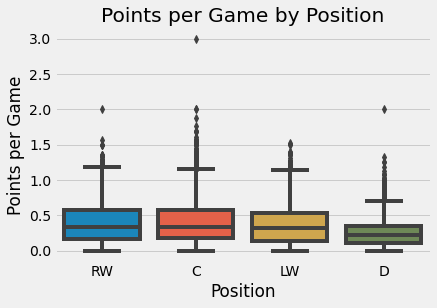

In [155]:
# plot ppg (continuous) vs position (categorical )
# box plot 
sns.boxplot(x = 'position', y = 'ppg', data = df)
plt.xlabel('Position')
plt.ylabel('Points per Game')
plt.title('Points per Game by Position');

# We can see the RW, C and LW have higher PPG than D 

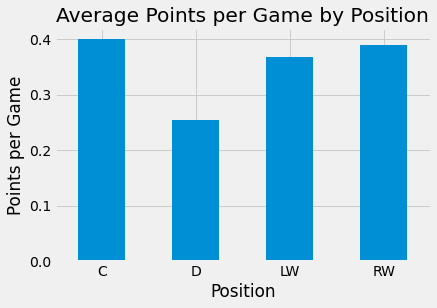

In [156]:
# bar plot with average 
df.groupby('position')['ppg'].mean().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel('Position')
plt.ylabel('Points per Game')
plt.title('Average Points per Game by Position');

### Continuous and Continous Data - 2 Features 

Plot goals (continuous) vs total points 

> Note for Barb: Total Points is defined as $$goals + assists$$

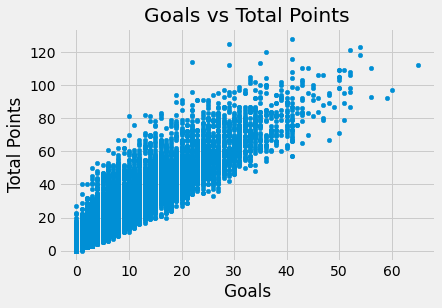

In [157]:
# plot goals (continuous) vs total points (continuous)

# scatter plot 
df.plot.scatter(x = 'g', y = 'tp')
plt.xlabel('Goals')
plt.ylabel('Total Points')
plt.title('Goals vs Total Points');

# we see a strong positive correlation between goals and total points

### Time Series - Features 

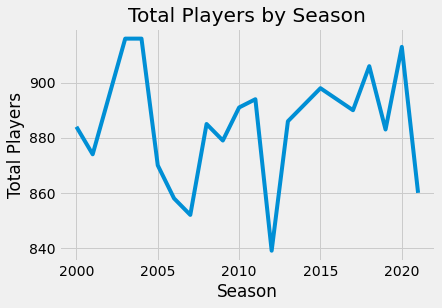

In [158]:
# total players by season 

# line plot 
df['season'].value_counts().sort_index().plot(kind = 'line')
plt.xlabel('Season')
plt.ylabel('Total Players')
plt.title('Total Players by Season');

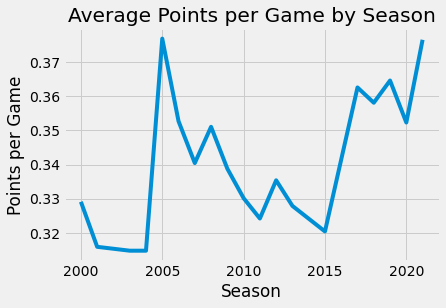

In [159]:
# average ppg by season 
df.groupby('season')['ppg'].mean().plot(kind = 'line')
plt.xlabel('Season')
plt.ylabel('Points per Game')
plt.title('Average Points per Game by Season');

## Bonus 

### Waffle Charts 

In [160]:
!pip install pywaffle

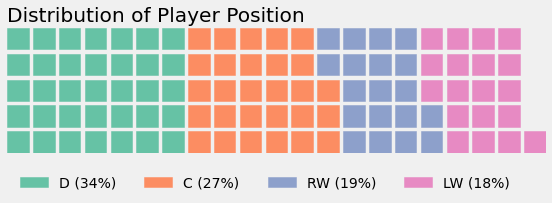

In [161]:
from pywaffle import Waffle

# plot distribution of player position using Waffle Chart
data = df['position'].value_counts(normalize = True).mul(100).to_dict()
fig = plt.figure(
    FigureClass=Waffle,
    title={'label': 'Distribution of Player Position', 'loc': 'left'},
    rows=5, 
    values=data, 
    labels=[f"{k} ({int(v)}%)" for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    figsize = (8, 4)
)
plt.show()